# Quicken Loans Bank Marketing Case Study
#### May 2008 to November 2010

### Data Information
This project is used as an assessment for Quicken Loans data-related roles. The data is related with direct marketing campaigns of a European banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. Information about a predictive model currently being used by the bank is also included. The dataset contains 41188 records with 20 inputs, ordered by date. 

#### Goals
The goal with this is to find data patterns and clean the data for further modeling to help this banking institution determine, in advance, clients who will be receptive to such marketing campaigns. Evaluate performance of the deployed model, state the evaluation metric used and suggest whether the bank ought to replace the current model (if applicable). Building a new model is not expected but would be a plus. If building a model, be sure to be familiar with that modeling approach. 

In [20]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from scipy import stats
import re

#Hide warnings
import warnings
warnings.filterwarnings('ignore')

In [21]:
#Read in CSV file
bank=pd.read_csv('DSA Data Set.csv')

# view shape of dataset
print("The bank dataset has {} data points with {} variables each.".format(*bank.shape))

# Display the first record
display(bank.head(n=5))

The bank dataset has 41188 data points with 22 variables each.


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.932750,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.953579,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.945724,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.933875,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.940996,no


### Data Preprocessing
There are columns that are challenging to work with due to their naming convention. That will be addressed in this section. 


#### Rename columns

Several columns will be renamed for ease of use and to remove the "." within column names.

In [22]:
bank.rename(columns={'emp.var.rate': 'var_rate', 'cons.price.idx': 'price_idx', 
                     'cons.conf.idx': 'conf_idx', 'nr.employed': 'employed'}, inplace=True)

#### Encode Desired Target Variable into integer
The binary target of '`y`' (yes/no) will need to be transformed into a variable that can be used for computation. 

In [23]:
bank.y.replace(('yes', 'no'), (1, 0), inplace=True)

### Data Exploration
In this section we would like to investigate/explore the variables contained in this dataset in order to gain an understanding of which may influence client receptiveness to marketing campaigns. 

The goal of this project is to provide deep data exploration and build an "improved" model that will predict what clients are receptive to marketing campaigns. The data will be split into features and a target variable. 

#### High level look into the data

This provides a brief overview of the numerical variables in dataset.

In [24]:
bank.describe()

,age,duration,campaign,pdays,previous,var_rate,price_idx,conf_idx,euribor3m,employed,ModelPrediction,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.887597,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.125351,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.250174,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.857484,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.945879,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.959214,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,0.988360,1.000000


#### Data Types and Null Values

This provides a a glance of each data type included in this datatset. This is especially helpful when generating output and/or combining variables. This dataset does not contain any null values. 

In [25]:
bank.info(), bank.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              41188 non-null  int64  
 1   job              41188 non-null  object 
 2   marital          41188 non-null  object 
 3   education        41188 non-null  object 
 4   default          41188 non-null  object 
 5   housing          41188 non-null  object 
 6   loan             41188 non-null  object 
 7   contact          41188 non-null  object 
 8   month            41188 non-null  object 
 9   day_of_week      41188 non-null  object 
 10  duration         41188 non-null  int64  
 11  campaign         41188 non-null  int64  
 12  pdays            41188 non-null  int64  
 13  previous         41188 non-null  int64  
 14  poutcome         41188 non-null  object 
 15  var_rate         41188 non-null  float64
 16  price_idx        41188 non-null  float64
 17  conf_idx    

(None,
 age                0
 job                0
 marital            0
 education          0
 default            0
 housing            0
 loan               0
 contact            0
 month              0
 day_of_week        0
 duration           0
 campaign           0
 pdays              0
 previous           0
 poutcome           0
 var_rate           0
 price_idx          0
 conf_idx           0
 euribor3m          0
 employed           0
 ModelPrediction    0
 y                  0
 dtype: int64)

#### Visualizing Data by Age, Contacts Performed for Client, Previous Days since Contacted, Duration of Last Contact, Euribor 3 Month Rate, and Number of Employees

* The age distribution is to be expected with the majority of clients between ages 30 and 50, which would roughly reflect working age. 
* The previous number of contacts performed for each client was for the majority of cases 0, with a small percentage of clients contacted once. 
* Building from the last point, the vast majority of clients have never been contacted before, which will be an excellent opportunity for outreach.
* The average duration of contact from campaign to client was 258 seconds which is roughly 4 minutes, and the mode (most commonly occurring value) being 85 seconds, just slightly longer than one minute in length. 
* Euribor is short for Euro Interbank Offered Rate, which are the interest rates at which financial products can be offered. The rate has hovered roughly at 5% for most clients. 
* The vast majority of number of employees are usually between 5200 and 5250. 


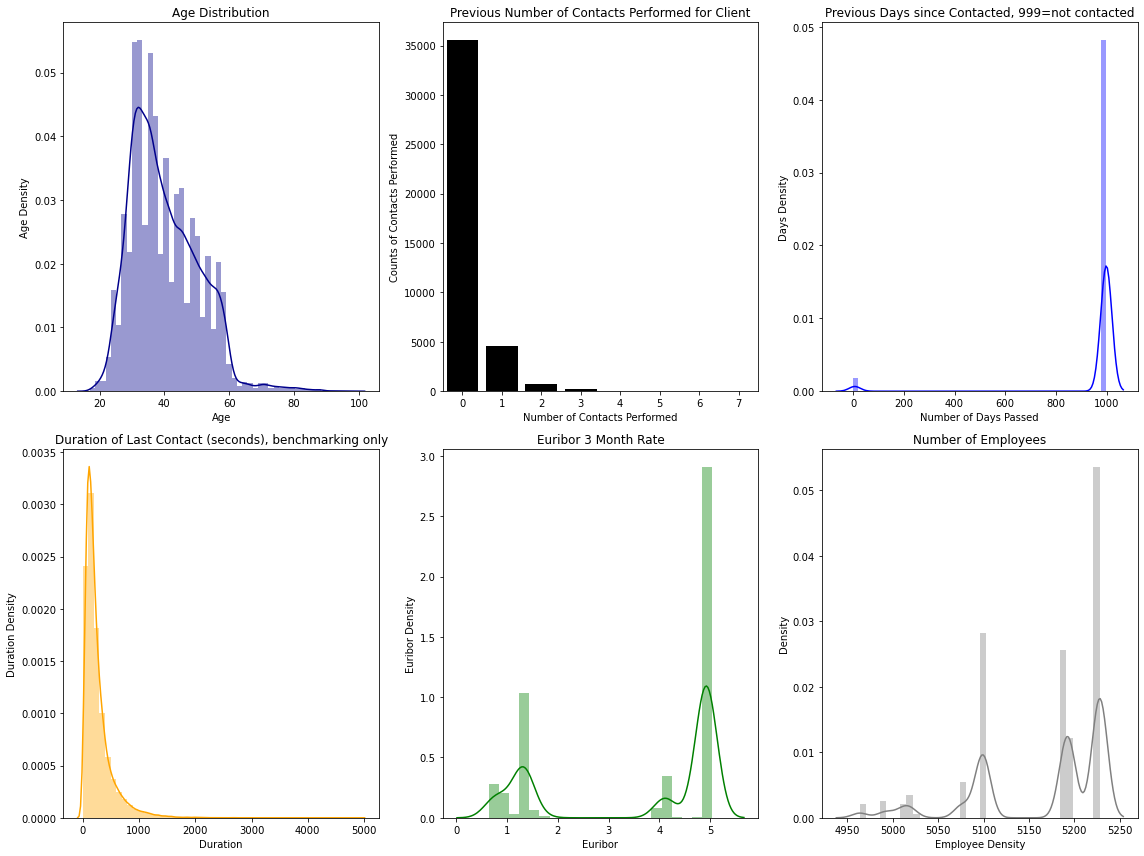

In [26]:
fig = plt.figure(figsize=(16,12))

#  subplot #1
plt.subplot(2,3,1)
sns.distplot(bank.age, color="darkblue")
plt.ylabel("Age Density")
plt.xlabel("Age")
plt.title("Age Distribution") 


plt.subplot(2,3,2)
sns.countplot(bank.previous, color="black")
plt.ylabel("Counts of Contacts Performed")
plt.xlabel("Number of Contacts Performed")
plt.title("Previous Number of Contacts Performed for Client") 


plt.subplot(2,3,3)
sns.distplot(bank.pdays, color="blue")
plt.ylabel("Days Density")
plt.xlabel("Number of Days Passed")
plt.title("Previous Days since Contacted, 999=not contacted") 


plt.subplot(2,3,4)
sns.distplot(bank.duration, color="orange")
plt.ylabel("Duration Density")
plt.xlabel("Duration")
plt.title("Duration of Last Contact (seconds), benchmarking only")


plt.subplot(2,3,5)
sns.distplot(bank.euribor3m, color="green")
plt.ylabel("Euribor Density")
plt.xlabel("Euribor")
plt.title("Euribor 3 Month Rate")


plt.subplot(2,3,6)
sns.distplot(bank.employed, color="grey")
plt.xlabel("Employee Density")
plt.title("Number of Employees") 

plt.tight_layout()
plt.show()


In [27]:
#Duration

# Minimum duration
min_med_duration = np.min(bank.duration)

# Maximum duration
max_med_duration = np.max(bank.duration)

# Mid point duration
mid_med_duration= (min_med_duration + max_med_duration  // 2)

#Average Duration
avg_duration=np.average(bank.duration)

#Mode duration
mode_duration=(int(stats.mode(bank.duration)[0]))

# Standard deviation of duration
std_med_duration = np.std(bank.duration)

# Show the calculated statistics
print("Statistics for Bank Marketing Case Study:\n")
print("Minimum Duration: {} Seconds".format(min_med_duration))
print("Maximum Duration: {} Seconds".format(max_med_duration))
print("Mid-point of Duration: {} Seconds".format(mid_med_duration))
print("Average Duration: {} Seconds".format(avg_duration))
print("Mode of Duration: {} Seconds".format(mode_duration)) 
print("Standard Deviation of Duration: {} Seconds".format(std_med_duration))

Statistics for Bank Marketing Case Study:

Minimum Duration: 0 Seconds
Maximum Duration: 4918 Seconds
Mid-point of Duration: 2459 Seconds
Average Duration: 258.2850101971448 Seconds
Mode of Duration: 85 Seconds
Standard Deviation of Duration: 259.27610130778396 Seconds


#### Last Contact
 The last contact the campaign had with the client noted that:
 * Most were called on their cellular phone and the remaining were called via telephone (perhaps a land line?). Given that many no longer have land lines, this is not unusual. 
 * Last contact month was highest in May, with the second highest being in July. A possible explanantion for why these particular months is during the height of campaign initiatives. 
 * The days of week where clients were conacted did not render anything interesting. It appears that clients are contacted roughly equally on each of the 5 days, with a slight preference to Mondays and Thursdays.

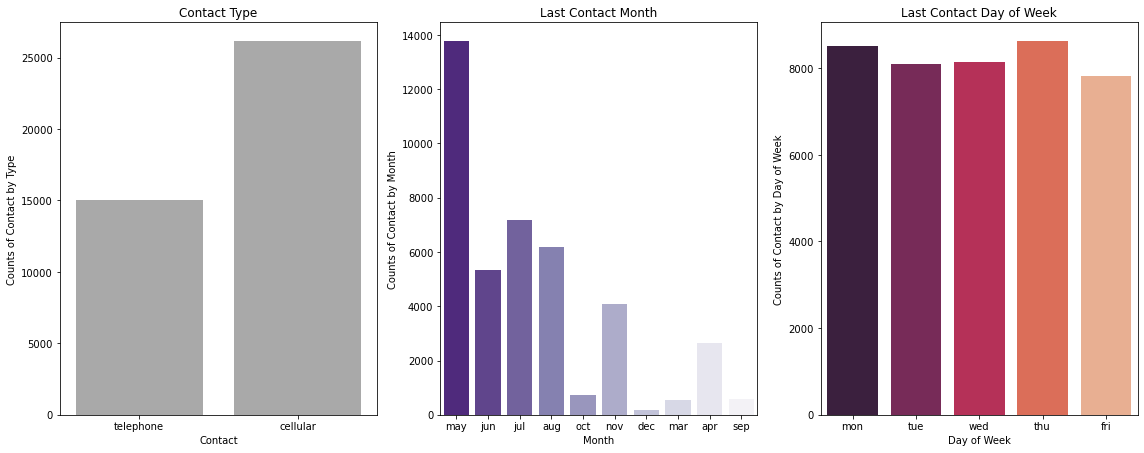

In [28]:
fig = plt.figure(figsize=(16,12))
plt.subplot(2,3,1)
sns.countplot(bank.contact, color="darkgrey")
plt.ylabel("Counts of Contact by Type")
plt.xlabel("Contact")
plt.title("Contact Type") 

plt.subplot(2,3,2)
sns.countplot(bank.month, palette="Purples_r")
plt.ylabel("Counts of Contact by Month")
plt.xlabel("Month")
plt.title("Last Contact Month") 

plt.subplot(2,3,3)
sns.countplot(bank.day_of_week, palette="rocket")
plt.ylabel("Counts of Contact by Day of Week")
plt.xlabel("Day of Week")
plt.title("Last Contact Day of Week") 
plt.tight_layout()
plt.show()

#### 

#### Previous Marketing Campaign, Marital Status and Credit Default
 
* Most clients are married (more than 60%), with the remainder being single (32%) and lastly divorced (8%). 
* The vast majority of clients have not defaulted on their credit, with a small percentage (about 4%) with status unknown. 
* The outcome of the previous marketing campaign was non-existent for most clients, with only a very small percentage being successful. This is not a favorable outcome.
 

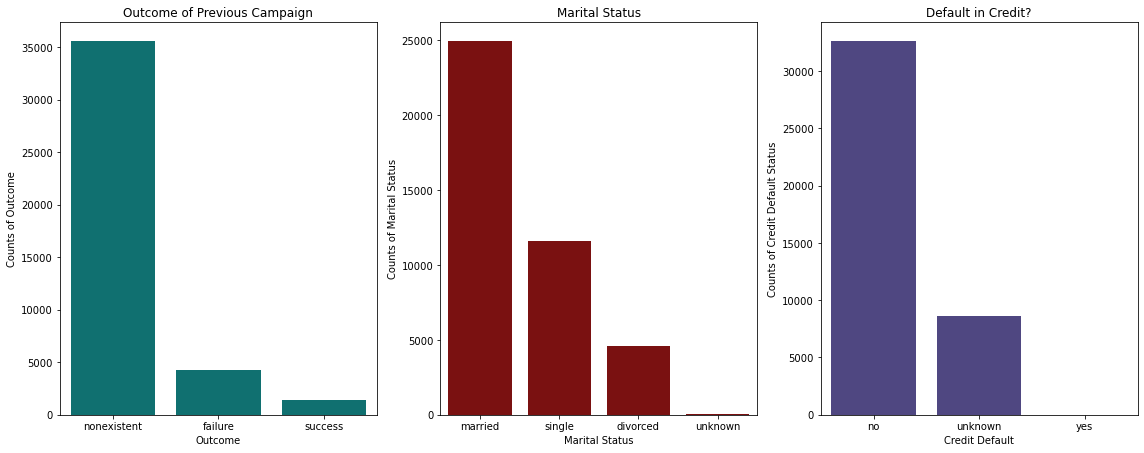

In [29]:
fig = plt.figure(figsize=(16,12))

plt.subplot(2,3,1)
sns.countplot(bank.poutcome, color="teal")
plt.ylabel("Counts of Outcome")
plt.xlabel("Outcome")
plt.title("Outcome of Previous Campaign") 

plt.subplot(2,3,2)
sns.countplot(bank.marital, color="darkred")
plt.ylabel("Counts of Marital Status")
plt.xlabel("Marital Status")
plt.title("Marital Status") 

plt.subplot(2,3,3)
sns.countplot(bank.default, color="darkslateblue")
plt.ylabel("Counts of Credit Default Status")
plt.xlabel("Credit Default")
plt.title("Default in Credit?") 
plt.tight_layout()
plt.show()

#### Job Type
* Most clients are employed in the administrative, blue-collar, or technician spaces. 

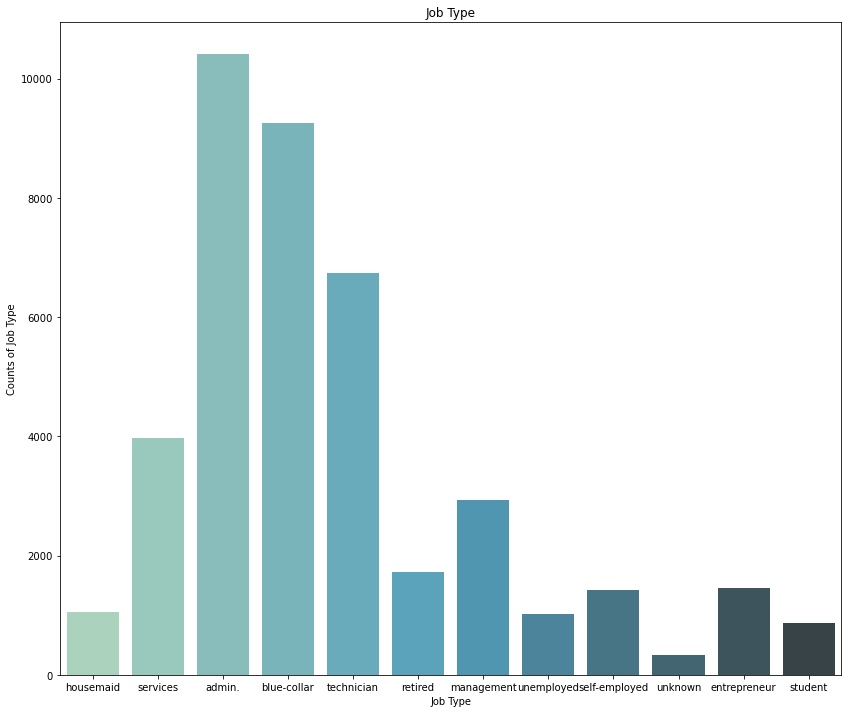

In [30]:
fig = plt.figure(figsize=(14,12))

sns.countplot(bank.job, palette="GnBu_d")
plt.ylabel("Counts of Job Type")
plt.xlabel("Job Type")
plt.title("Job Type") 

plt.show()

#### Education
* 30% of clients holds a university degree, followed by clients with a high school education (between 19-22%). 

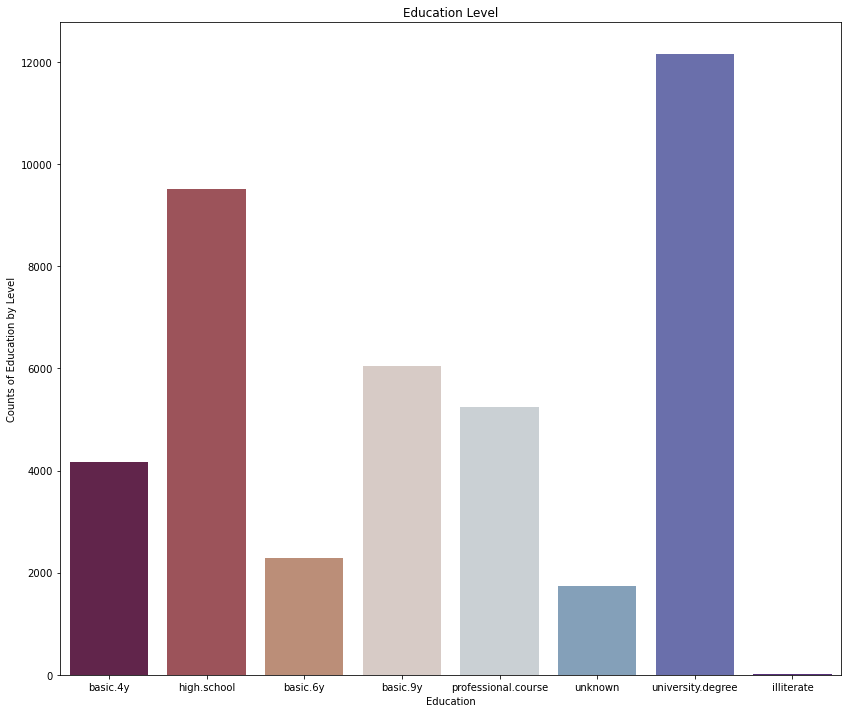

In [31]:
fig = plt.figure(figsize=(14,12))

sns.countplot(bank.education, palette="twilight_shifted_r")
plt.ylabel("Counts of Education by Level")
plt.xlabel("Education")
plt.title("Education Level") 

plt.show()

#### Loans

* Roughly half of clients have a housing loan, with less than half not having one (potentially a good opportunity to market services to these particular clients). 

* The vast majority of clients do not have a personal loan with a small percentage (perhaps 5%) that do. 

* Clients have not subscribed to a term deposit, with the percentages looking closely similar to whether the client not having a personal loan. 

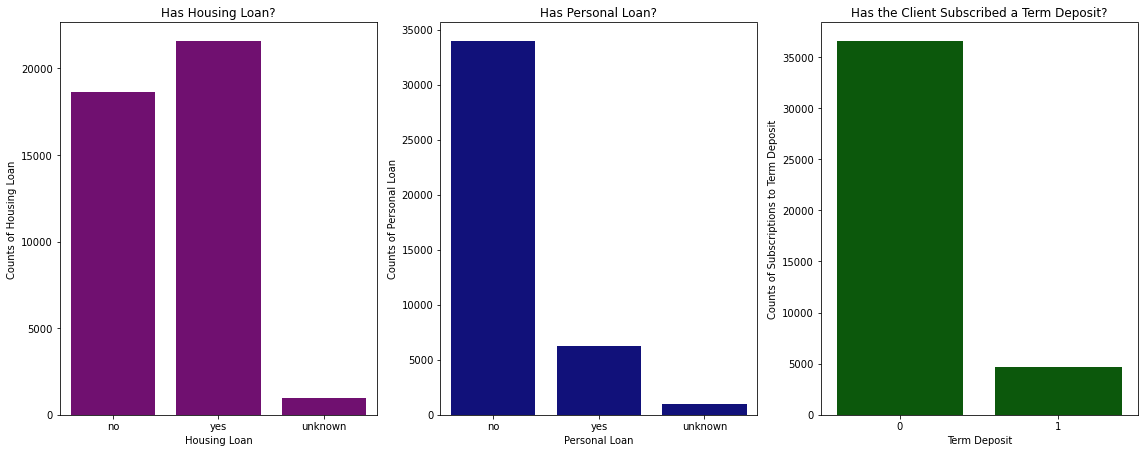

In [32]:
fig = plt.figure(figsize=(16,12))
plt.subplot(2,3,1)
sns.countplot(bank.housing, color="purple")
plt.ylabel("Counts of Housing Loan")
plt.xlabel("Housing Loan")
plt.title("Has Housing Loan?") 

plt.subplot(2,3,2)
sns.countplot(bank.loan, color="darkblue")
plt.ylabel("Counts of Personal Loan")
plt.xlabel("Personal Loan")
plt.title("Has Personal Loan?") 

plt.subplot(2,3,3)
sns.countplot(bank.y, color="darkgreen")
plt.ylabel("Counts of Subscriptions to Term Deposit")
plt.xlabel("Term Deposit")
plt.title("Has the Client Subscribed a Term Deposit?") 
plt.tight_layout()
plt.show()

#### Model Performance

* In reviewing term deposit and the model performance, most clients were associated with having a high probability of subscribing to a term deposit (more than 80%, and frequently more than 90%). 

* In theory there should have been a much more favorable subscription rate than there has been. This indicates that although the model itself has performed well, it has not been of value for the campaign in meeting their goals. This performance may be the outcome of overfitting or imbalanced datasets. 

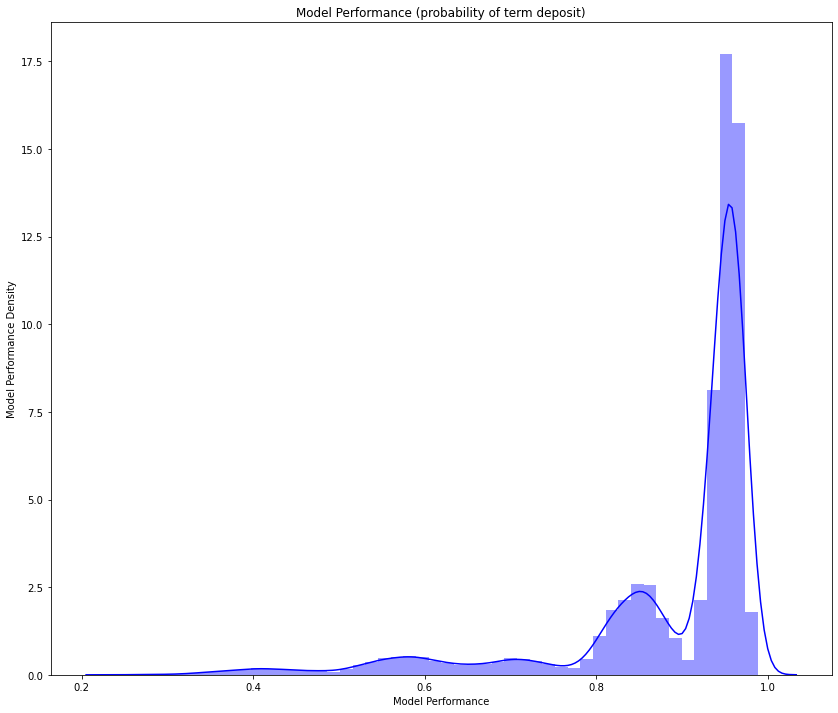

In [33]:
fig = plt.figure(figsize=(14,12))

sns.distplot(bank.ModelPrediction, color="blue")
plt.ylabel("Model Performance Density")
plt.xlabel("Model Performance")
plt.title("Model Performance (probability of term deposit)") 
plt.show()

#### Correlation Matrix

A correlation matrix allows the observations of the relation between features/variables by drawing a heat map. Based on the output from the map, the following are features by correlation:

<ins>High Correlation</ins>

1. var rate and employed (very high!)
2. var rate and euribor3m (very high!)
3. var rate and price idx
4. var rate and ModelPrediction
5. employed and ModelPrediction (very high!)
6. euribor3m and ModelPrediction
7. euribor3m and employed (very high!)
8. euribor3m and price idx
9. pdays and ModelPrediction 


<ins>Medium Correlation<ins>
1. pdays and employed
2. price idx and employed
3. euribor3m and pdays
4. employed and price idx
5. employed and previous
6. price idx and ModelPrediction

<ins>Low Correlation<ins>
1. pdays and previous
2. previous and ModelPrediction
3. previous and employed
4. previous and euribor3m
5. previous and var rate


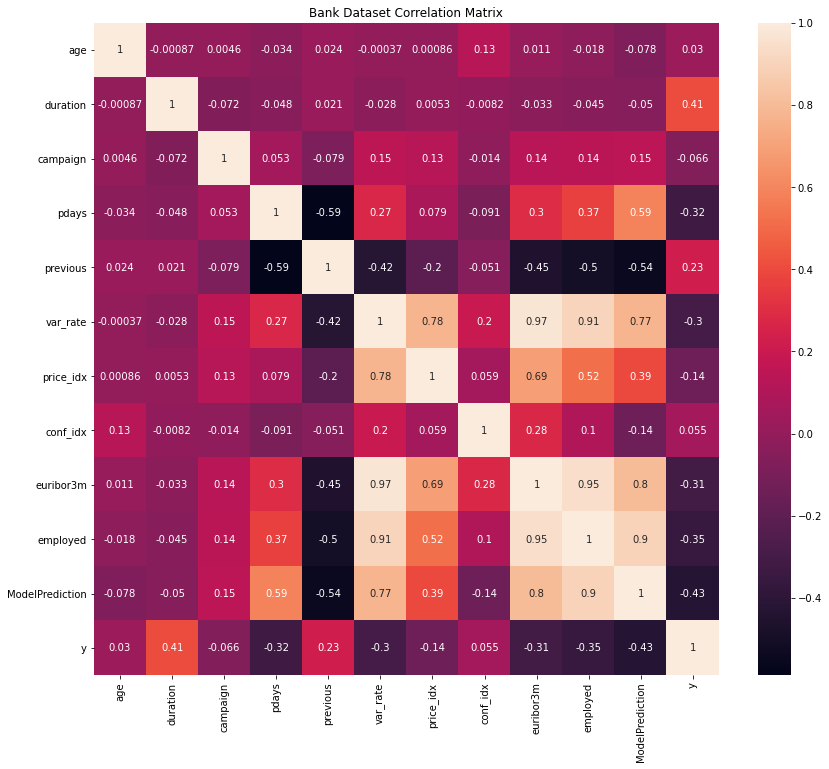

In [34]:
plt.figure(figsize=(14,12))
corr = bank.corr()
sns.heatmap(corr, annot=True, cmap="rocket",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title("Bank Dataset Correlation Matrix") 
plt.show()

#### Potential Features

Given the above results and for the purtposes of developing a model, we will drop the categorical variables and focus on the numerical variables for the time being. We will better select features in the next section. We will omit '`ModelPrediction`' , as that is the outcome of the previous model that we have determined did not meet the needs of the campaign's goals. We will also omit '`Duration`'because this is not known until the call is made, so it will not be helpful for predictive modeling purposes. 

In [35]:
potential_fea=bank[['age', 'campaign', 'pdays', 'previous', 'var_rate', 'price_idx', 'conf_idx', 'euribor3m', 'employed']]

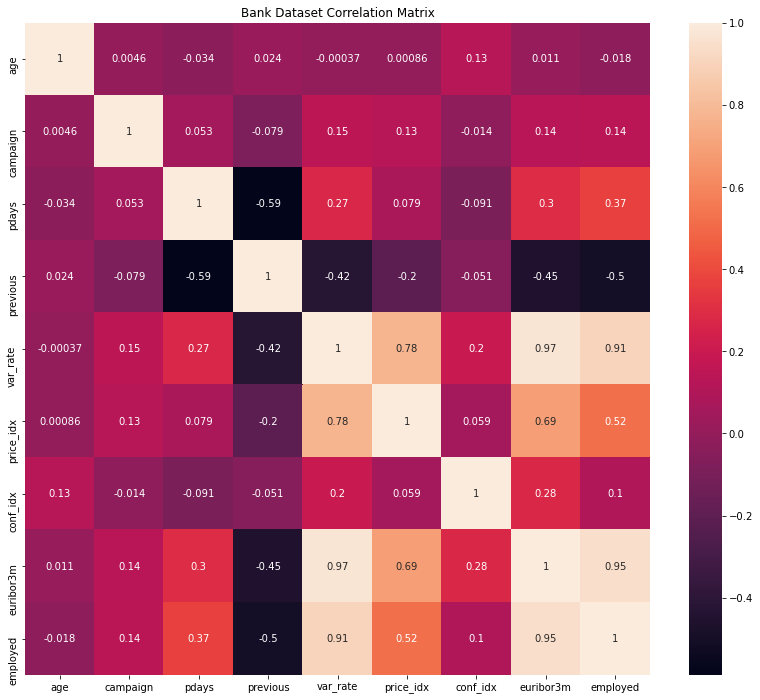

In [36]:
plt.figure(figsize=(14,12))
corr = potential_fea.corr()
sns.heatmap(corr, annot=True, cmap="rocket",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title("Bank Dataset Correlation Matrix") 
plt.show()

### Feature Selection-Feature Importance

To continue our work above, we will use feature importance for feature selection. Feature importance gives a score for each  feature in the data and how relevant it is towards the output variable (whether a client has subscribed to a term deposit). Feature importance is an inbuilt class that comes with tree classifiers. 

#### Training/Testing
First we will split the data into traiing and testing at a 80/20 split. 

The data will also be shuffled into a random order when creating the training and testing subsets to remove bias in the ordering of the dataset.

Splitting a dataset into testing and training subsets allows for the data to properly train then evaluate the performance on new data (testing). It is important to use both a training and testing set in order to evaluate the true performance of the model on unseen data to avoid issues such as overfitting, which is the model may do very well on training, but poorly on testing since the model simply memorized the seen data. 

In [37]:
import sklearn 
from sklearn.model_selection import train_test_split

X_1train, X_1test, Y_1train, Y_1test = train_test_split(potential_fea, bank['y'], test_size=0.2, random_state=70)
X_1train.shape, X_1test.shape, Y_1train.shape, Y_1test.shape
print("Training set has {} samples.".format(X_1train.shape[0]))
print("Testing set has {} samples.".format(X_1test.shape[0]))

Training set has 32950 samples.
Testing set has 8238 samples.


[0.32837796 0.11643299 0.10642918 0.03528192 0.03490826 0.02343495
 0.03344039 0.24295628 0.07873807]


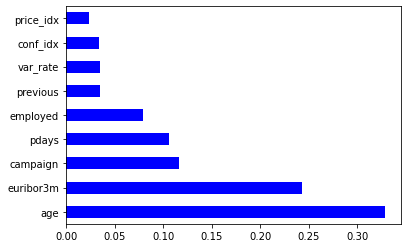

In [38]:
X1 = X_1train  #independent columns
y1 = Y_1train    #target column 
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X1,y1)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances 
feat_importances = pd.Series(model.feature_importances_, index=X1.columns)
feat_importances.nlargest(9).plot(kind='barh', color='blue')
plt.show()

#### Features Selected


We are selecting the 4 following features based on their ranking from feature selection and how relevant they are to the target.

'`age`'
'`campaign`'
'`euribor3m`'
'`previous`'

In [39]:
features=bank[['age', 'campaign',  'pdays', 'euribor3m']]

#### Reshuffle and Resplit Data
A feature set has been selected.

In [40]:
#Resplit data based upon newly chosen features
X_train, X_test, Y_train, Y_test = train_test_split(features, bank['y'], test_size=0.2, random_state=90)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 32950 samples.
Testing set has 8238 samples.


### Model Development

The features are: 

'`age`' is the age of each client in the dataset.

'`campaign`' number of contacts performed during the campaign for this client.

'`euribor3m`' the euribor 3 month rate for this client. 

'`pdays`' number of days passed after the client was last contaced by a previous campaign. 

The target variable, '`y`', which is whether the client has subscribed to a term deposit will be the variable we seek to predict. 



### Model Performance

**We will investigate two models and determine which model is the best with this particular dataset.**

*Models to test:*

**<ins>XGBoost</ins>**


Strengths: One of the best supervised ensemble algorithms for structured datasets (such as the bank dataset), and ease of use. 

Weaknesses: Can be prone to overfitting, if you have noisy data. 

**<ins>Naive Bayes</ins>**


Strengths: Easy to build accurate models with high performance and simplicity. 

Weaknesses: Makes the assumption that the variables in the dataset are "naive", or independent from one another. 


#### XGBoost

In [41]:
#XGBoost Model
import xgboost as xgb
from sklearn.metrics import mean_squared_error

#Transform into an array to Dmatrix

D_train = xgb.DMatrix(X_train, label=Y_train)
D_test = xgb.DMatrix(X_test, label=Y_test)

#Define parameters
parameter = {
    'eta': 0.3, 
    'eval_metric': 'merror',
    'max_depth': 3,  #max depth of decision trees being trained
    'objective': 'multi:softmax',  #loss function being used
    'num_class': 2} #number of classes in target variable (1 or 0 for yes/no)

steps =20 #training iterations


In [42]:
model = xgb.train(parameter, D_train, steps)

In [43]:
#Evaluate performance of model at this point
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score

preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(Y_test, best_preds, average='macro'))) #Precision = True positives. Rows that classified as term deposit, actually term deposit.  
print("Recall = {}".format(recall_score(Y_test, best_preds, average='macro'))) #Ratio of true positives, rows classified as term deposit compared to all rows. 
print("Accuracy = {}".format(accuracy_score(Y_test, best_preds))) #Measures how often the classifier makes the correct prediction.

Precision = 0.44331148336974996
Recall = 0.5
Accuracy = 0.8866229667394999


In [44]:
#Parameter tuning
from sklearn.model_selection import GridSearchCV

clf = xgb.XGBClassifier()
parameters = {
     "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
     }

grid = GridSearchCV(clf,
                    parameters, n_jobs=4,
                    scoring="neg_log_loss",
                    cv=3)

grid.fit(X_train, Y_train)

[08:06:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

#### Evaluate results of this model

In [46]:
model.dump_model('dump.raw.txt')

#### Naive Bayes

In [62]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

#Classifier
classifier = GaussianNB()

#Train the model using the training sets
classifier.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred = classifier.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print("Precision:",metrics.precision_score(Y_test, y_pred))
print("recall:",metrics.recall_score(Y_test, y_pred))


Accuracy: 0.8953629521728574
Precision: 0.5904522613065326
recall: 0.25160599571734477


In [ ]:
#hyperparameter tuning
from sklearn import svm

hyper = {'C':[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1],
         'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
         'kernel':['rbf','linear']
        }

gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)

gd.fit(X_train,Y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


### Conclusion

In conclusion, both models appear to be good choices for model development, however, the results do not appear to be significantly more improved the the output of the original model.

The original model itself was likely useful, and the issue may be the campaign team was likely not interacting with it, or felt comofortable using it. 

When creating predictive analytics solutions, ensure that the business goals align with these activities. getting buy in from staff is important when deploying solutions. 